In [2]:
import pandas as pd
import os
import numpy as np
from math import sqrt

from sklearn.utils import shuffle
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error, median_absolute_error
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, KFold, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.stem.snowball import SnowballStemmer
from tqdm import tqdm_notebook
import IPython.display as ipd
import statistics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

In [3]:
def rmse(y, y_pred):
    return sqrt(mean_squared_error(y, y_pred))

def mae(y, y_pred):
    return mean_absolute_error(y,y_pred)

def median_err(y,y_pred):
    return median_absolute_error(y,y_pred)

In [4]:
eda_dataset = pd.read_csv("eda_dataset_dy.csv")
eda_dataset

,subjectId,musicId,frameTime,auc,meanEDA,stdEDA,kurtEDA,skewEDA,meanDerivative,meanNegativeDerivative,...,mfccCoefficient[17],mfccCoefficient[18],mfccCoefficient[19],meanMFCC,stdMFCC,medianMFCC,kurtMFCC,skewMFCC,Arousal(mean),Valence(mean)
0,110411.0,381.0,15.5,2.691047,2.745075,0.211684,-1.218576,-0.241533,-0.014078,0.014078,...,6.728451,5.804605,6.816611,16.442745,33.262789,11.268778,4.190516,-0.036576,0.937113,0.808887
1,100166.0,381.0,15.5,2.919028,2.979160,0.237943,-1.337689,0.174388,-0.015508,0.015508,...,9.371109,7.779243,9.373275,16.816454,33.861526,10.879046,4.585747,-0.876073,0.937113,0.808887
2,100164.0,381.0,15.5,2.191273,2.234915,0.141167,-1.142693,-0.421448,-0.009092,0.009092,...,6.066501,5.413157,5.836361,15.239095,36.464341,10.985811,4.983576,-0.708825,0.937113,0.808887
3,100162.0,381.0,15.5,0.130102,0.132780,0.016361,-1.201516,0.090031,-0.001129,0.001129,...,8.426964,6.318338,8.377410,2.433123,88.767521,11.894947,12.633877,-3.596033,0.937113,0.808887
4,100165.0,381.0,15.5,0.701175,0.715248,0.054745,-1.216988,-0.247891,-0.003637,0.003637,...,6.688721,5.802189,6.772726,9.830727,56.867083,11.215614,9.525906,-2.724289,0.937113,0.808887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365373,100153.0,919.0,56.0,0.003519,0.003592,0.000498,-1.176806,0.154052,-0.000035,0.000035,...,7.368965,4.643352,7.196147,-14.543780,159.683668,11.221217,14.163796,-3.944399,0.584438,0.766325
365374,100159.0,919.0,56.0,0.060744,0.062004,0.008573,-1.177576,0.152290,-0.000594,0.000594,...,7.381731,4.669018,7.225754,-0.568237,100.072751,11.262306,12.875552,-3.648593,0.584438,0.766325
365375,100158.0,919.0,56.0,0.323462,0.330011,0.030495,-1.234678,-0.097857,-0.002067,0.002067,...,8.240448,7.111026,8.323998,6.011494,73.216286,11.965834,11.774994,-3.381094,0.584438,0.766325
365376,200439.0,919.0,56.0,2.216315,2.262531,0.051885,-0.524278,-0.007864,0.002152,-0.002152,...,0.885114,-7.704250,-5.500026,10.221805,41.968374,5.977633,4.349398,-0.487532,0.584438,0.766325


In [5]:
df = eda_dataset.groupby(by=['musicId', 'frameTime'], as_index=False).mean()

In [7]:
df

,musicId,frameTime,subjectId,auc,meanEDA,stdEDA,kurtEDA,skewEDA,meanDerivative,meanNegativeDerivative,...,mfccCoefficient[17],mfccCoefficient[18],mfccCoefficient[19],meanMFCC,stdMFCC,medianMFCC,kurtMFCC,skewMFCC,Arousal(mean),Valence(mean)
0,1.0,15.5,111277.8,1.115977,1.138890,0.048442,-1.208544,0.172049,-0.002742,0.002742,...,6.347103,5.654210,7.353584,6.952108,64.372597,10.999682,9.527445,-2.451492,0.437662,0.559975
1,1.0,16.0,111277.8,1.050445,1.071912,0.039205,-0.992753,0.013443,-0.002504,0.002504,...,7.752146,6.481111,6.631390,6.826462,67.077755,12.462917,10.164304,-2.807505,0.437775,0.560650
2,1.0,16.5,111277.8,0.998610,1.019276,0.041443,-0.810991,0.174334,-0.001738,0.001738,...,8.022753,7.000912,7.192596,6.188604,65.489784,10.557276,9.240587,-2.436417,0.443125,0.559900
3,1.0,17.0,111277.8,0.978219,0.998284,0.073067,-1.176674,0.081099,-0.000303,0.000303,...,9.002904,8.713021,6.391006,8.259135,68.257263,14.723816,10.437735,-2.941798,0.442887,0.560212
4,1.0,17.5,111277.8,0.962822,0.982097,0.056340,-0.632945,-0.360683,-0.001064,0.001064,...,3.711254,3.031527,4.823265,7.511321,65.361105,11.787457,8.936709,-2.270221,0.444563,0.563337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36429,1000.0,75.0,111279.8,0.069978,0.071486,0.018882,-1.248154,0.158633,0.000447,-0.000447,...,6.821670,4.467391,4.677196,-9.499029,135.671111,11.316435,13.098592,-3.675955,0.657438,0.593450
36430,1000.0,75.5,111279.8,0.084934,0.086635,0.019015,-1.068966,-0.043558,0.000676,-0.000676,...,6.196835,4.923989,6.091342,-9.901593,136.167106,10.994341,12.997334,-3.627550,0.641650,0.591437
36431,1000.0,76.0,111279.8,0.098376,0.100349,0.015115,-0.629900,0.277291,0.000482,-0.000482,...,1.170338,1.206245,5.619390,-9.066286,129.434979,10.619134,12.823596,-3.584967,0.641650,0.588437
36432,1000.0,76.5,111279.8,0.108106,0.110298,0.011411,0.184100,0.312248,0.000305,-0.000305,...,4.605835,3.087110,4.353636,-7.216157,121.548821,10.706435,12.950002,-3.638345,0.637537,0.588437


Index(['musicId', 'frameTime', 'subjectId', 'auc', 'meanEDA', 'stdEDA',
       'kurtEDA', 'skewEDA', 'meanDerivative', 'meanNegativeDerivative',
       'SMA_f', 'meanEDA_f', 'stdEDA_f', 'signalRange_f', 'kurtEDA_f',
       'skewEDA_f', 'signalEnergy', 'SpectralPower_band1',
       'SpectralPower_band2', 'SpectralPower_band3', 'SpectralPower_band4',
       'SpectralPower_band5', 'minSpectralPower', 'maxSpectralPower',
       'varSpectralPower', 'mfccCoefficient[0]', 'mfccCoefficient[1]',
       'mfccCoefficient[2]', 'mfccCoefficient[3]', 'mfccCoefficient[4]',
       'mfccCoefficient[5]', 'mfccCoefficient[6]', 'mfccCoefficient[7]',
       'mfccCoefficient[8]', 'mfccCoefficient[9]', 'mfccCoefficient[10]',
       'mfccCoefficient[11]', 'mfccCoefficient[12]', 'mfccCoefficient[13]',
       'mfccCoefficient[14]', 'mfccCoefficient[15]', 'mfccCoefficient[16]',
       'mfccCoefficient[17]', 'mfccCoefficient[18]', 'mfccCoefficient[19]',
       'meanMFCC', 'stdMFCC', 'medianMFCC', 'kurtMFCC', 'ske

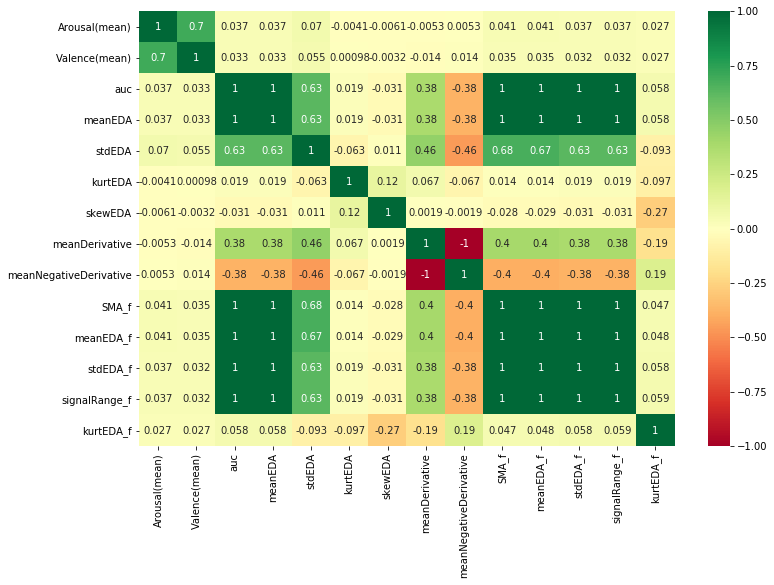

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
feature_current = df.iloc[:,-2:]
analyze_data = pd.concat([feature_current,df.iloc[:,3:15]],axis = 1)
data = analyze_data

corrmat = data.corr()
top_corr_features = corrmat.index
g = sns.heatmap(data[top_corr_features].corr(),annot = True,cmap = 'RdYlGn')
print(df.columns)

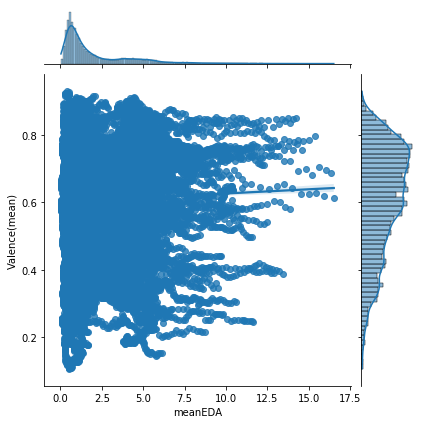

In [40]:
# plt.plot(df.iloc[:50,5])
sns.jointplot(data = df, x = 'meanEDA',y = 'Valence(mean)',kind='reg')

In [9]:
songs = df['musicId'].unique()
songs = shuffle(songs, random_state=10)
test_num = round(len(songs)*0.1)
testsongs = songs[:test_num]
print(list(testsongs))

[176.0, 775.0, 242.0, 249.0, 507.0, 34.0, 434.0, 78.0, 522.0, 717.0, 868.0, 651.0, 54.0, 793.0, 516.0, 519.0, 580.0, 761.0, 550.0, 56.0, 784.0, 237.0, 461.0, 491.0, 759.0, 172.0, 113.0, 997.0, 745.0, 411.0, 427.0, 704.0, 807.0, 656.0, 217.0, 495.0, 421.0, 309.0, 149.0, 968.0, 905.0, 407.0, 402.0, 358.0, 263.0, 413.0, 993.0, 501.0, 342.0, 744.0, 729.0, 710.0, 751.0, 188.0, 343.0, 230.0, 885.0, 540.0, 103.0, 366.0, 969.0, 909.0, 235.0, 834.0, 897.0, 517.0, 39.0, 609.0, 439.0, 594.0, 539.0, 161.0, 746.0, 720.0, 931.0, 292.0, 238.0]


In [159]:
len(songs)

767

In [11]:
iftestset = df['musicId'].apply(lambda x: x in testsongs)
testset = df[iftestset]
trainset = df[~iftestset]

In [25]:
testset

,musicId,frameTime,subjectId,auc,meanEDA,stdEDA,kurtEDA,skewEDA,meanDerivative,meanNegativeDerivative,...,mfccCoefficient[17],mfccCoefficient[18],mfccCoefficient[19],meanMFCC,stdMFCC,medianMFCC,kurtMFCC,skewMFCC,Arousal(mean),Valence(mean)
1313,34.0,15.5,111209.8,0.940818,0.960198,0.031921,-1.103006,-0.109672,-0.000176,0.000176,...,7.080421,4.993551,4.370146,5.630341,69.345750,11.529073,10.122017,-2.851699,0.678887,0.825775
1314,34.0,16.0,111209.8,0.941049,0.960181,0.030438,-1.002471,-0.197034,-0.000005,0.000005,...,3.736669,3.105023,3.963982,5.699641,67.958608,10.958120,9.491467,-2.595086,0.678125,0.836100
1315,34.0,16.5,111209.8,0.946803,0.966411,0.069765,-0.956425,0.049741,0.000641,-0.000641,...,4.223013,0.120780,2.285073,7.019527,67.929458,13.157245,9.044217,-2.400916,0.678000,0.833212
1316,34.0,17.0,111209.8,0.966319,0.985831,0.075852,-0.638840,-0.454539,0.000763,-0.000763,...,4.201502,3.489117,4.118046,4.803100,70.232489,11.502928,9.493275,-2.557871,0.680113,0.818337
1317,34.0,17.5,111209.8,0.973582,0.993304,0.051454,-0.686575,0.234454,-0.000462,0.000462,...,3.831528,3.975379,5.358735,5.599012,70.248218,11.549583,9.515199,-2.642777,0.670337,0.809875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36257,997.0,56.0,111297.3,1.083854,1.106257,0.105703,-0.871447,0.094672,0.003503,-0.003503,...,2.987094,2.620021,5.769794,4.962420,71.744052,9.759052,9.840414,-2.252615,0.612100,0.642113
36258,997.0,56.5,111297.3,1.185746,1.209656,0.098285,-0.882429,-0.299643,0.004480,-0.004480,...,5.480778,3.389457,5.066986,4.886922,69.710214,9.885922,10.165156,-2.137218,0.608325,0.639888
36259,997.0,57.0,111297.3,1.264066,1.289300,0.064906,-1.078137,0.017050,0.002128,-0.002128,...,1.654005,1.361921,4.183217,5.602208,72.776938,11.800115,9.939763,-2.272560,0.592225,0.637013
36260,997.0,57.5,111297.3,1.281515,1.307492,0.035420,-0.816620,-0.011994,-0.000316,0.000316,...,6.696752,6.141242,5.952932,5.885673,71.751057,11.233179,10.087333,-2.326710,0.605213,0.629887


In [26]:
eda_fea_tr = trainset[trainset.columns[3:-2]].astype(float)
eda_fea_te = testset[testset.columns[3:-2]].astype(float)

In [43]:
# model_ada = AdaBoostRegressor(random_state=29, n_estimators=9)
model_ada = Lasso()
model_ada.fit(eda_fea_tr,trainset["Arousal(mean)"])
ypr = model_ada.predict(eda_fea_te)
rmse(ypr,testset["Arousal(mean)"])

0.17591569498582152

In [138]:
def train_model(model,randomx):
    resultx = []
    resultx_mae = []
    resultx_med = []
    for i in randomx:
        str = "Valence(mean)"
        songs = df['musicId'].unique()
        songs = shuffle(songs, random_state=i)
        test_num = round(len(songs)*0.1)
        testsongs = songs[:test_num]
#         print(list(testsongs))
        iftestset = df['musicId'].apply(lambda x: x in testsongs)
        testset = df[iftestset]
        trainset = df[~iftestset]
        eda_fea_tr = trainset[trainset.columns[3:-2]].astype(float)
        eda_fea_te = testset[testset.columns[3:-2]].astype(float)
        model_ada = model
        model_ada.fit(eda_fea_tr,trainset[str])
        ypr = model_ada.predict(eda_fea_te)
        res = rmse(ypr,testset[str])
        res2 = mae(ypr,testset[str])
        res3 = median_err(ypr,testset[str])
#         print(i," ",res)
        resultx.append(res)
        resultx_mae.append(res2)
        resultx_med.append(res3)
    print("Result :",statistics.mean(resultx))
    return statistics.mean(resultx), statistics.mean(resultx_mae), statistics.mean(resultx_med)

In [119]:
randomx = [1,3,5,10,15]
train_model(Lasso(random_state=29,alpha = 0.01,max_iter = 100000),randomx)

Result : 0.15972393584854006


(0.15972393584854006, 0.13173846497702746, 0.12158198126171142)

In [84]:
train_model(ElasticNet(random_state=29),randomx)

1   0.16472101478591566
3   0.18443143149291966
5   0.177907368779264
10   0.17515291212480208
15   0.16047720077192548
Result : 0.17253798559096536


(0.17253798559096536, 0.14706209346264365, 0.14096834767889524)

In [155]:
from warnings import filterwarnings
filterwarnings('ignore')
train_model(Ridge(random_state=29),randomx)

Result : 0.15982236358982257


(0.15982236358982257, 0.13189705477426608, 0.12255444702105121)

In [93]:
train_model(KNeighborsRegressor(n_neighbors=150),randomx)

Result : 0.17727510504683755


(0.17727510504683755, 0.15104967665041985, 0.14287445606060603)

In [61]:
# train_model(SVR(kernel='rbf', gamma='scale'),randomx)

1   0.1682528943296573
3   0.18794525013795893
5   0.1825362695532205
10   0.18290100131797735
15   0.16401064760999415
Result : 0.17712921258976164


In [88]:
# from warnings import filterwarnings
# filterwarnings('ignore')
# train_model(LinearSVR(max_iter=10000),randomx)

In [96]:
train_model(DecisionTreeRegressor(random_state=29,max_depth=5),randomx)

Result : 0.1749471387793174


(0.1749471387793174, 0.14721709581140208, 0.13666227314576695)

In [98]:
train_model(RandomForestRegressor(random_state=29,n_estimators=10),randomx)

Result : 0.184950668835994


(0.184950668835994, 0.1537539816420951, 0.1386417348484848)

In [132]:
train_model(AdaBoostRegressor(random_state=29, n_estimators=9),randomx)

Result : 0.1640506685846598


(0.1640506685846598, 0.13755190220682967, 0.13237761761729352)

In [66]:
train_model(BaggingRegressor(n_estimators=10,random_state=29),randomx)

1   0.1751614794964814
3   0.19398907766538231
5   0.1918618380253421
10   0.18698625968360968
15   0.17642362472609063
Result : 0.1848844559193812


In [131]:
train_model(ExtraTreesRegressor(n_estimators=30,random_state=29),randomx)

Result : 0.1670757882665445


(0.1670757882665445, 0.13797374319685252, 0.12644254545454545)

In [130]:
train_model(GradientBoostingRegressor(random_state=10,n_estimators=12),randomx)

Result : 0.15982591647841915


(0.15982591647841915, 0.13135670840556282, 0.12119098394352022)

In [70]:
train_model(LinearRegression(),randomx)

1   0.1645184109983092
3   0.18457448188157083
5   0.17704663475616236
10   0.17434042255058108
15   0.16095642401177143
Result : 0.17228727483967898


In [135]:
models = [Lasso(random_state=29,alpha = 0.01,max_iter = 100000),
          ElasticNet(random_state=29),
          Ridge(random_state=29),
          KNeighborsRegressor(n_neighbors=150),
          DecisionTreeRegressor(random_state=29,max_depth=5),
          RandomForestRegressor(random_state=29,n_estimators=10),
          AdaBoostRegressor(random_state=29, n_estimators=9),
          BaggingRegressor(n_estimators=10,random_state=29),
          ExtraTreesRegressor(n_estimators=30,random_state=29),
          GradientBoostingRegressor(random_state=10,n_estimators=12),
          LinearRegression()]

In [136]:
rmse_l = []
mae_l = []
mdae_l = []

rmse_l_v = []
mae_l_v = []
mdae_l_v = []

In [137]:
randomx = [1,3,5,10,15]

for i in models:
    a,b,c = train_model(i,randomx)
    rmse_l.append(a)
    mae_l.append(b)
    mdae_l.append(c)

Result : 0.17197484473882144
Result : 0.17253798559096536
Result : 0.17223286878232463
Result : 0.17727510504683755
Result : 0.1749471387793174
Result : 0.184950668835994
Result : 0.1762148536391418
Result : 0.1848844559193812
Result : 0.1801770924259256
Result : 0.1726462447512383
Result : 0.17228727483967898


In [139]:
randomx = [1,3,5,10,15]

for i in models:
    a,b,c = train_model(i,randomx)
    rmse_l_v.append(a)
    mae_l_v.append(b)
    mdae_l_v.append(c)

Result : 0.15972393584854006
Result : 0.1602694295905002
Result : 0.15982236358982257
Result : 0.16378287790938345
Result : 0.1627145104821358
Result : 0.17151789911569382
Result : 0.16301199208183342
Result : 0.1716983404234253
Result : 0.1670757882665445
Result : 0.15982591647841915
Result : 0.15998577216880988


In [140]:
col = ["Lasso","ElasticNet","Ridge","kNN","DT",
       "RF","AdaBoost","Bagging Reg",
       "ExtraTree Reg","Gradient Boosting","LR"]

In [141]:
result_a = pd.DataFrame(data = [rmse_l,mdae_l,mae_l], columns = col)
result_a.insert(0,"Error Parameter", ["RMSE","MDAE","MAE"])
result_v = pd.DataFrame(data = [rmse_l_v,mdae_l_v,mae_l_v], columns = col)
result_v.insert(0,"Error Parameter", ["RMSE","MDAE","MAE"])

In [142]:
result_a

,Error Parameter,Lasso,ElasticNet,Ridge,kNN,DT,RF,AdaBoost,Bagging Reg,ExtraTree Reg,Gradient Boosting,LR
0,RMSE,0.171975,0.172538,0.172233,0.177275,0.174947,0.184951,0.176215,0.184884,0.180177,0.172646,0.172287
1,MDAE,0.139838,0.140968,0.139881,0.142874,0.136662,0.138642,0.146939,0.139404,0.138003,0.139553,0.140008
2,MAE,0.146177,0.147062,0.146330,0.151050,0.147217,0.153754,0.151254,0.153603,0.150758,0.146909,0.146366


In [143]:
result_v

,Error Parameter,Lasso,ElasticNet,Ridge,kNN,DT,RF,AdaBoost,Bagging Reg,ExtraTree Reg,Gradient Boosting,LR
0,RMSE,0.159724,0.160269,0.159822,0.163783,0.162715,0.171518,0.163012,0.171698,0.167076,0.159826,0.159986
1,MDAE,0.121582,0.122922,0.122554,0.123734,0.123175,0.127336,0.130693,0.127517,0.126443,0.121191,0.122802
2,MAE,0.131738,0.131912,0.131897,0.134133,0.133741,0.140907,0.136387,0.141105,0.137974,0.131357,0.132000


In [157]:
result_a.to_csv("eda_dynamic_arousal.csv",index = False)
result_v.to_csv("eda_dynamic_valence.csv",index = False)